In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [2]:
data = pd.read_csv("modified Train.csv")
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
2,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
3,0025bde0c.jpg,4,315139 8 315395 15 315651 16 315906 17 316162 ...
4,002af848d.jpg,4,290800 6 291055 13 291311 15 291566 18 291822 ...
...,...,...,...
2890,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
2891,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
2892,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
2893,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


3    950
1    897
4    801
2    247
Name: ClassId, dtype: int64

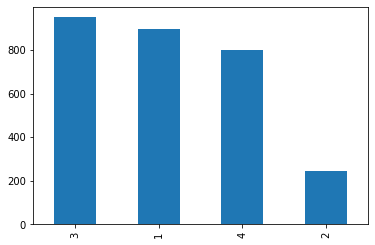

In [3]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

In [33]:
l1=[]
l2=[] 
for img,ClassId,EncodedPixels in tqdm(data.values):
    image=cv2.imread("train_images/{}".format(img),cv2.IMREAD_COLOR)
    image=cv2.resize(image,(120,120))
    l1.append(image)
    l2.append(ClassId)

100%|██████████| 2895/2895 [00:30<00:00, 93.39it/s] 


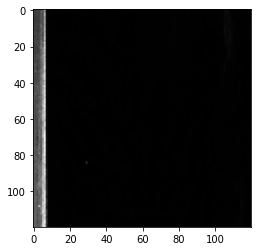

In [34]:
i = 15
plt.imshow(l1[i])

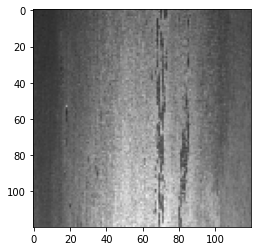

In [35]:
i = 16
plt.imshow(l1[i])

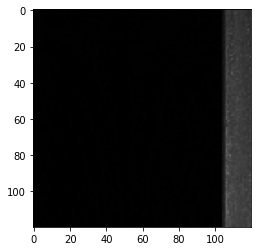

In [36]:
i = 90
plt.imshow(l1[i])

encoder = LabelEncoder()

X= np.array(l1)
X = X/255

y = encoder.fit_transform(l2)
y = to_categorical(y)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


**Splitting the data into 80% train set and 20% test set**

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)

In [10]:
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (2316, 120, 120, 3)
x_test shape: (579, 120, 120, 3)
y_train shape: (2316, 4)
y_test shape: (579, 4)


In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

In [23]:
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1, callbacks=[early_stopping])

Epoch 1/15
19/19 [==============================] - 44s 2s/step - loss: 1.0450 - accuracy: 0.4529 - val_loss: 1.0346 - val_accuracy: 0.5389
Epoch 2/15
19/19 [==============================] - 40s 2s/step - loss: 1.0343 - accuracy: 0.4961 - val_loss: 0.9796 - val_accuracy: 0.5561
Epoch 3/15
19/19 [==============================] - 35s 2s/step - loss: 0.9658 - accuracy: 0.5419 - val_loss: 0.9226 - val_accuracy: 0.5872
Epoch 4/15
19/19 [==============================] - 34s 2s/step - loss: 0.9442 - accuracy: 0.5440 - val_loss: 0.9000 - val_accuracy: 0.5889
Epoch 5/15
19/19 [==============================] - 29s 2s/step - loss: 0.9242 - accuracy: 0.5635 - val_loss: 0.9720 - val_accuracy: 0.5026
Epoch 6/15
19/19 [==============================] - 32s 2s/step - loss: 0.8907 - accuracy: 0.5786 - val_loss: 0.9041 - val_accuracy: 0.5613
Epoch 7/15
19/19 [==============================] - 34s 2s/step - loss: 0.8984 - accuracy: 0.5717 - val_loss: 0.9381 - val_accuracy: 0.5682
Epoch 8/15
19/19 [==

<AxesSubplot:title={'center':'Loss curve'}>

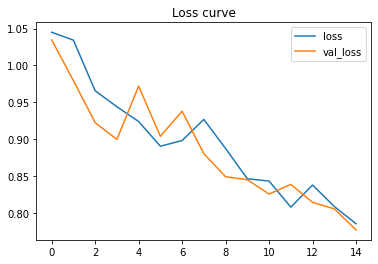

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<AxesSubplot:title={'center':'Accuracy curve'}>

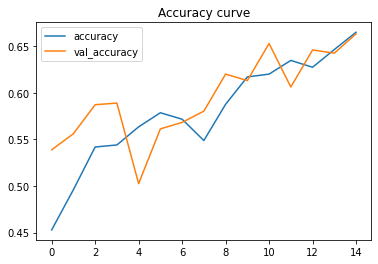

In [25]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [78]:
result = model.evaluate(X_test, y_test)
print(result)
loss = result[0]
accuracy = result[1]
print(f"Accuracy: {accuracy*100:.2f}%")

19/19 [==============================] - 4s 218ms/step - loss: 0.7774 - accuracy: 0.6632
[0.7774403095245361, 0.6632124185562134]
Accuracy: 66.32%


In [76]:
test_image = tf.keras.preprocessing.image.load_img('train_images/83d2fffd3.jpg', target_size = (120, 120,3))
class_labels=[1, 2, 3, 4]
Any_var=test_image
Any_var.show()


test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = np.argmax(model.predict(test_image))
print("The coroded image is classified as {}.".format(class_labels[result]))


The coroded image is classified as 4.


In [88]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train = train_datagen.flow_from_directory("train_images", target_size = (120, 120),batch_size = 32, class_mode = 'categorical')
test= test_datagen.flow_from_directory("test_images",target_size = (120, 120),batch_size = 32, class_mode = 'categorical') 
model.fit_generator(train,steps_per_epoch = 8000,epochs = 10,validation_data= test,  validation_steps = 2000)   

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


C:\Users\HP\AppData\Local\Temp\ipykernel_9256\3629841610.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,steps_per_epoch = 8000,epochs = 10,validation_data= test,  validation_steps = 2000)
